# Introduction

This paper aims to provide an introduction to boosting algorithms. Boosting is a machine learning ensemble algorithms that aims to combine the predictions of several weak learners (models that are only slightly better than random guessing) to create a strong learner. The idea behind it, is to train a sequence of weak learners, where each one tries to correct the mistakes of its predecessor. This way, the overall model become more complex and thus, reduces the bias. The most popular boosting algorithms are AdaBoost, Gradient Boosting and XGBoost. In this paper, we will provide an overview of these algorithms and discuss their main characteristics. Note that I will use decision trees as weak learners in the examples, but it is possible to use other types of models.

# Background

The main idea in boosting is to combine the predictions of several weak learners to create a strong learner. The way it works is by training a sequence of weak learners (tipcally decision trees) where each one tries to correct the mistakes of its predecessor as mentioned before. Consider the following example: Lets say we want to classify between the two classes 1 and 0. We gather some data, conduct a research and decide we want to use boosting. Thus, we start by training a weak learner (a decision tree) on the data denoted as $f_1$ and get the following results:

| Data Point | Prediction |
|------------|------------|
| 1          | 1          |
| 0          | 1          |
| 0          | 0          |
| 1          | 0          |


The weak learner $f_1$ has made some mistakes so to compensate for that, we train a second weak learner $f_2$ on the residuals of the first weak learner. Let $\hat{y_i}$ be the prediction of the model for the i'th observation and $y_i$ be the true label. The residual for the i'th observation is defined as $y_i - \hat{y_i}$ which is essentially the distance between the prediction and the true label. Back to our example, the residuals for the first weak learner are:

| Data Point | Residual |
|------------|----------|
| 1          | 0        |
| 0          | -1       |
| 0          | 0        |
| 1          | 1        |

We now give a bigger weight to the observation that were misclassified by the first desicion tree. Then, we train a second decision tree. The second decision tree goal is to try and correct the mistakes of the first decision tree. This process can be repeated several times until we reach a stopping criteria (e.g. a maximum number of weak learners).

## Decision Trees

Decision trees are the most common weak learners used in boosting algorithms. A decision tree is a tree-like model of decisions and their possible consequences. The tree is composed of nodes and edges. The nodes represent the features in the dataset and the edges represent the decision rules. The tree is built by recursively splitting the data into subsets based on the features that give the most information gain (The split is determined by different criteria such as Gini impurity or entropy). As the tree grows, the model becomes more complex and can capture more patterns however, it is also prone to overfitting. In boosting, we use decision trees with a small depth (i.e. 3-10 levels) to prevent overfitting.

![Decision Tree Diagram](./images/tree.png)

*Figure 1. Decision Tree Diagram on the Iris Dataset created using sklearn. Source: [https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)*



## Objective Function 


Consider the objective function $$\sum_{i=1}^{n} L(y_i, \hat{y_i}) + \sum_{k=1}^{K} \Omega(f_k) + const$$ where $L$ is the loss function, $\hat{y_i}$ is i'th the prediction of the model, $\Omega(f_k)$ is the regularization term, $f_k$ is the k-th weak learner and $K$ is the number of weak learners. As the weak learners are mostly decision trees, we can't use algorithms such as gradient descent as trees are not represented as numerical vectors. Instead, we can use something called additive training. 

## Additive Training

The idea behind additive training is to add a new weak learner to the model that minimizes the objective function. Let $\hat{y_i}^{(0)}$ be the intial prediction for the i'th observation. We can use additive training to define the way we make predictions.

The prediction for the i'th observation can be defined as:

$$\hat{y_i}^{(0)} = 0$$
$$\hat{y_i}^{(1)} = \hat{y_i}^{(0)} + \eta f_1(x_i)$$
$$\hat{y_i}^{(2)} = \hat{y_i}^{(1)} + \eta f_2(x_i)$$
$$.$$
$$.$$
$$.$$
$$\hat{y_i}^{(K)} = \hat{y_i}^{(k-1)} + \eta f_K(x_i)$$

Where $f_k(x_i)$ is the prediction of the k-th weak learner for the i'th observation,  $\hat{y_i}^{(k-1)}$ are the predictions from previous rounds and $\eta$ is the learning rate parameter which controls the contribution of each tree. So, applying additive training to our objective function, we get:

$$\sum_{i=1}^{n} L(y_i, \hat{y_i}^{(k-1)} + \eta f_K(x_i)) + \sum_{k=1}^{K} \Omega(f_k) + const$$

So, the goal is to find the weak learner $f_k$ that minimizes the objective function. This can be done by using taylor expansion to approximate the objective function. 

## Taylor Expansion

Recall the taylor expansion of a function $f(x)$ around a point $x_0$ is:

$$f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)(x-x_0)^n}{n!}$$

However, we can ignore the higher order terms and approximate the function as:

$$f(x) \approx f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)(x-x_0)^2}{2!}$$

We can apply the talyor expansion to the objective function since we're always around the point f_k(x_i). Thus, we get:

$$obj^{(k)} \approx \sum_{i=1}^{n} [L(y_i, \hat{y_i}^{k-1}) + g_i \eta f_k(x_i) + \frac{h_i \eta^2 f_k^2(x_i)}{2!}] + \Omega(f_k)$$

where $g_i$ and $h_i$ are the first and second order derivatives of the loss function with respect to the prediction from the previous round $k-1$. The derivaties are defined as: $$g_i = \frac{\partial L(y_i, \hat{y_i}^{k-1})}{\partial \hat{y_i}^{k-1}}$$  $$h_i = \frac{\partial^2 L(y_i, \hat{y_i}^{k-1})}{\partial^2 \hat{y_i}^{k-1}}$$ 


### Why do we use the taylor expansion?

In boosting, we aim to find the weak learner $f_k$ that minimizes the objective function, which includes the loss and regularization term (as defined above). However, directly minimizing this function is diffcult because decision trees are not differentiable. Taylor expansion allows us to approximate the objective function  in a way that makes it easier to optimize.

## Regularization Term

The regularization term $\Omega(f_k)$ is used to prevent overfitting. The regularization term is defined as:

$$\Omega(f_k) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2$$

where $T$ is the number of leaves in the tree, $w_j$ is the prediction of the j'th leaf and $\gamma$ is the complexity parameter that penalizes the number of leaves in the tree (deep trees are prone to overfitting) and $\lambda$ is the regularization parameter that penalizes the complexity of the tree which is simply the L2 regularization term on the weights of the leaves.


### How do we find gamma and lambda?

The hyperparameters $\gamma$ and $\lambda$ are found using cross-validation. We train the model with different values of $\gamma$ and $\lambda$ and select the values that give the best performance on the validation set.


# Boosting Process

The boosting process can be summarized as follows:

1. Intialize the prediction to a simple model, such as the mean (for regression) or the mode (for classification) of the target variable. This initial prediction is denoted as $\hat{y_i}^{(0)}$.

2. Iteratively Add Weak Learners:

    * For each weak leaner $k$, perform the following steps:

        a. **Create a Subset of the Data:** by randomly sampling (without replacement) using weighted sampling. 

        b. **Fit a Weak Learner:** $f_k$ to the subset of the data with the sample weights. 

        c. **Update the Predictions:** update the predictions using additive training:
        $$\hat{y_i}^{(k)} = \hat{y_i}^{(k-1)} + \eta f_k(x_i)$$

        d. **Compute the Residuals:** $$r_i = y_i - \hat{y_i}^{(k)}$$
        
        e. **Update the Sample Weights:** Can be done using various of heuristics such as: 
            * Using the residuals: 
            $$w_i = \exp(-r_i)$$
            * Using the learning rate: 
            $$w_i = w_i*(1+\eta)$$. 
            
3. Repeat step 2 until the number of weak learners reaches a stopping criterion:

    * A maximum number of weak leaners (Iteration) $K$.
    * The improvement in the model's perfroamce falls below a certain threshold.
    * Cross-validation indicates no further improvement in the model's performance.

**Note: the rule of cross-validation regarding the number of trees is to choose the right number of trees that gives the best performance but also doesn't overfit the data.** 

![Boosting Process Diagram](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*4XuD6oRrgVqtaSwH-cu6SA.png)

*Figure 2. Boosting Process Diagram. Source: Soni, B. (n.d.). Understanding Boosting in Machine Learning: A Comprehensive Guide. Medium. Retrieved June 28, 2024, from [https://medium.com/@brijesh_soni/understanding-boosting-in-machine-learning-a-comprehensive-guide-bdeaa1167a6](https://medium.com/@brijesh_soni/understanding-boosting-in-machine-learning-a-comprehensive-guide-bdeaa1167a6)*


# Python Implementation

On this part, I will use boosting to classify the digits dataset from sklearn (Multi-Class Classification). I will implement the boosting method using decision trees classifiers as my weak learners. Additionaly, I will update the weight of the observations that were misclassified by the previous weak learner using the formula:

$${w_i * (1+\eta)}$$

where $w_i$ is the weight of the i'th observation and $\eta$ is the learning rate. Note that the weights will be normalized so that they sum to 1. 

In [19]:
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt

In [22]:
# Sample data
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

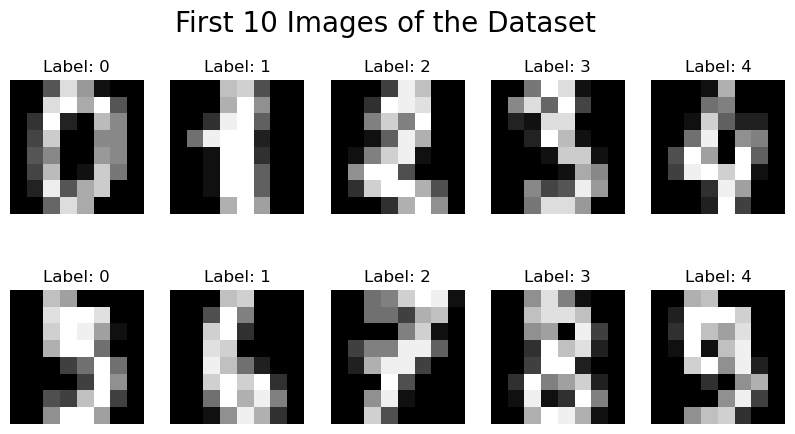

In [38]:
n,m = X.shape
images = X.reshape(n, int(np.sqrt(m)), int(np.sqrt(m)))

# Plot some images

fig, ax = plt.subplots(2,5, figsize = (10,5))

for i in range(5):
    ax[0,i].imshow(images[i], cmap = 'gray')
    ax[1,i].imshow(images[i+5], cmap = 'gray')
    ax[0,i].axis('off')
    ax[1,i].axis('off')
    ax[0,i].set_title('Label: {}'.format(y[i]))
    ax[1,i].set_title('Label: {}'.format(y[i]))

plt.suptitle("First 10 Images of the Dataset", fontsize = 20)
plt.show()

In [14]:
class Boosters():
    def __init__(self, learning_rate = 0.01, boosters = 100):
        """
        Learning rate: The step size at which the model learns (eta)
        Boosters: The number of trees in the ensemble (Will be used as the stopping criteria for the model)
        """
        self.learning_rate = learning_rate
        self.boosters = boosters
        self.models = []
        self.predictions = []
        self.intial_predictions = None
        self.weights = None
    
    def fit(self, X, y):
        # Initialize the weights
        self.weights = np.ones(y.shape)/y.shape[0]
        
        # Determine the initial prediction (Most Common Class)
        self.intial_predictions = stats.mode(y).mode[0]
        self.f_k = np.full(y.shape, self.intial_predictions, dtype=float)
        self.predictions.append(self.f_k)
        self.residuals = y - self.f_k
        rows_idx = np.arange(X.shape[0])

        for k in range(self.boosters):
            # Create a subset of the data (row wise) - sample 80% of the data for each tree
            sample_idx =  np.random.choice(rows_idx, size = (X.shape[0]*0.8) , replace=False, p=self.weights)
            X_sample = X[sample_idx]
            y_sample = y[sample_idx]
            sample_weights = self.weights[sample_idx]

            # Fit a decision tree to the residuals
            f_k = DecisionTreeClassifier(max_depth = 4)
            f_k.fit(X=X_sample, y=y_sample, sample_weight=sample_weights)
            self.models.append(f_k)
            # Make predictions
            y_hat = f_k.predict(X) # we predict on the entire dataset to update the residuals

            # Update the predictions
            self.f_k += self.learning_rate * y_hat
            self.predictions.append(self.f_k)
            # Update the residuals
            self.residuals = y - self.f_k

            # Update the weights
            incorrect_preds = (y!=y_hat).astype(int)
            self.sample_weights[incorrect_preds] *= (1+self.learning_rate)
            # Normalize the weights
            self.sample_weights /= np.sum(self.sample_weights)
    
    def predict(self, X):
        final_preds = np.full(X.shape[0], self.intial_predictions)

        for model in self.models:
            final_preds += self.learning_rate * model.predict(X)

        
        self.preds = np.round(final_preds).astype(int)
        return self.preds

# Bibliography



### References 

Ieftimov, V. (n.d.). Classifier Decision Trees. Retrieved June 28, 2024, from [https://ieftimov.com/posts/classifier-decision-trees/](https://ieftimov.com/posts/classifier-decision-trees/)


Soni, B. (n.d.). Understanding Boosting in Machine Learning: A Comprehensive Guide. Medium. Retrieved June 28, 2024, from [https://medium.com/@brijesh_soni/understanding-boosting-in-machine-learning-a-comprehensive-guide-bdeaa1167a6](https://medium.com/@brijesh_soni/understanding-boosting-in-machine-learning-a-comprehensive-guide-bdeaa1167a6)
